# Introduction to Visualzing Data with Python

This assignment will serve as a self-guided tour of major plotting libraries of Python. Major plotting libraries are listed below. You can find a more complete list [here](https://wiki.python.org/moin/NumericAndScientific/Plotting).

+ `Matplotlib`
+ `Bokeh`

## Learning Goals

1. Tour of plotting with the python package `Matplotlib`.
    1. `Pyplot` API vs Object Oriented approach.
    1. Line plots.
    1. Scatter plots.
    1. Histograms.
3. Tour of `Bokeh`.
    1. Basic interactive plots.
    1. Hover tools.

### Prepare Notebook

The code below imports all needed packages. It is considered good form to import packages at the top of your notebook. If you find that you need an additional package, you should add it to this cell and re-run it.

In [3]:
# Import scientific packages.
import numpy as np
import pandas as pd

# Import plotting libraries.
import matplotlib
import matplotlib.pyplot as plt
# import a 3d axis toolkit.
from mpl_toolkits.mplot3d import Axes3D

# Use jupyter notebooks inline function to simplify plot display.
# For interactive plots within Jupyter Notebooks.
# %matplotlib notebook

# For static plots.
%matplotlib inline

## Line Plots

Line plots are among the simplest we can make, and will serve as our introduction to the API of `matplotlib`. Below is a very simple example plot.

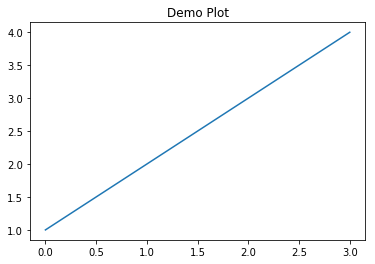

In [4]:
plt.plot([1,2,3,4])
plt.title('Demo Plot')
plt.show()

Something confusing has happened above. Despite giving only one dimension of data, the plot is shown with two! This is a feature of matplotlib. Per the documentation:

>You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the `plot(`) command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are `[0,1,2,3]`.

To plot x versus y, simply give two arguments.

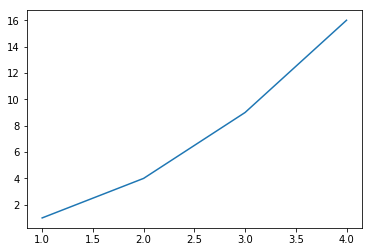

In [35]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Valid calls to `plt.plot()` include:

```python
plt.plot(x, y)        # plot x and y using default line style and color
plt.plot(x, y, 'bo')  # plot x and y using blue circle markers
plt.plot(y)           # plot y using x as index array 0..N-1
plt.plot(y, 'r+')     # ditto, but with red plusses
```

Read or skim through the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) of `plt.plot()`. 

# Scatter Plots

I will introduce some boiler plate code here for interacting with `matplotlib`. As you can see from the first few examples, you do not always need to be this explicit, but there is no harm in doing so and it allows for more controll over the plots you create.

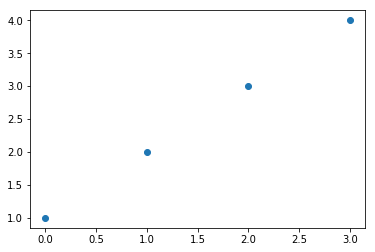

In [36]:
# Create a figure.
fig = plt.figure()

# Add `subplot` or `axis` to the figure.
# In the current figure, create and return an Axes, at position index of 
# a (virtual) grid of nrows by ncols axes. Indexes go from 1 to nrows * ncols, 
# incrementing in row-major order.
ax = fig.add_subplot(1, 1, 1)

# Use this created axis to plot the same data.
ax.plot([1,2,3,4], 'o')

plt.show()

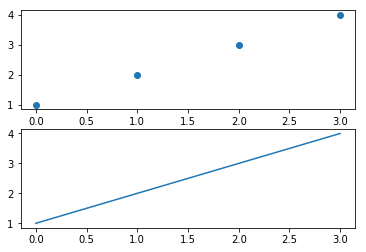

In [37]:
# Create a figure.
fig = plt.figure()

# Add `subplot` or `axis` to the figure.
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# Use this created axis to plot the same data.
ax1.plot([1,2,3,4], 'o')
ax2.plot([1,2,3,4])

plt.show()

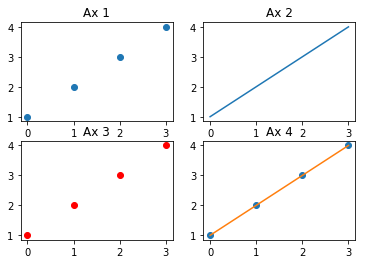

In [40]:
# Create a figure.
fig = plt.figure()

# Add `subplot` or `axis` to the figure.
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Use this created axis to plot the same data.
ax1.plot([1,2,3,4], 'o')
ax1.set_title('Ax 1')

ax2.plot([1,2,3,4])
ax2.set_title('Ax 2')

ax3.plot([1,2,3,4], 'ro')
ax3.set_title('Ax 3')

ax4.set_title('Ax 4')
ax4.plot([1,2,3,4], 'o')
ax4.plot([1,2,3,4])

plt.show()

# Assignment

1. Recreate the above plots in the **Scatter Plot** section using another dimension of data, ie. assign explicit x values to those plots instead of allowing them to be autogenerated. 

In [7]:
# Single plot.

In [8]:
# Double plot.

In [9]:
# Quad plot.

## Random Distribution Generation

Build some data for plotting.

In [6]:
# This sets the seed for the random generator. This makes calls to random
# return the same sets of values.
np.random.seed(42)

mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution

# Standard.
r_standard = mu + sigma * np.random.randn(500)

# Beta.
r_beta = mu + sigma * np.random.beta(1, 1, 500)

# Histograms

See the documentation at [Matplotlib histogram docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

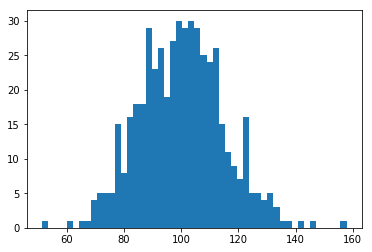

In [7]:
# Create a figure, this demonstrates another way to use the matplotlib API.
# Assign the figure and the (default) generated axis with plt.subplots().
fig, ax = plt.subplots()

# the histogram of the data
ax.hist(r_standard, 50)

plt.show()

# Assignment

1. Create four more histograms using different random distributions. Use whatever distributions you would like. See the `numpy` docs regarding [random distributions](https://docs.scipy.org/doc/numpy/reference/routines.random.html).
2. Plot a histogram for each of these distributions.

In [12]:
# Histogram 1.

In [13]:
# Histogram 2.

In [14]:
# Histogram 3.

In [8]:
# Histogram 4.

## Revisiting Line Plots -- Plotting Functions

We often would like to combine two different types of plots on one axis. Let's explore this feature by plotting a random distribution curve with a histogram.

### Normal Distribution

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [9]:
def normal_dist(x, mu, sigma):
    """Returns the probability density of a normal distribution with the given mu and sigma."""
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.e**(-(x - mu)**2 / (2 * sigma**2))

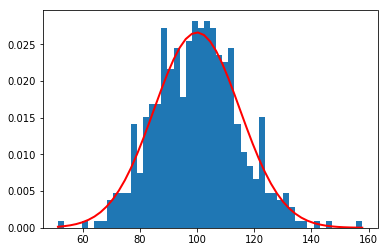

In [10]:
# Create a figure, this demonstrates another way to use the matplotlib API.
# Assign the figure and the (default) generated axis with plt.subplots().
fig, ax = plt.subplots()

# Draw histogram of the data, this time collect the outputs for use.
count, bins, ignored = ax.hist(r_standard, 50, normed=True)

ax.plot(
    bins,
    normal_dist(bins, 100, 15),
    linewidth=2,
    color='r'
)

plt.show()

# Assignment

Pick **two** more of the distrubutions above and plot the probability density function with the histogram as shown above. Pay close attention to the `normed=True` argument passed above!

**Go to the documentation linked above, what does the `ax.hist()` function return?**

Functions for each distribution can be found in the numpy documentation for that distrubition.

In [18]:
# Distribution + Probability Function 1.

In [19]:
# Distribution + Probability Function 2.

# 3-Dimensional Data

This section explores how we can add another dimension (spatial or otherwise) to our plots. I am going to use the [Boltzmann Distribution](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution).

#### Boltzmann Probability Distribution

$$
P(\alpha) = e^{\frac{-E(\alpha)}{kT}}
$$

In [12]:
def calc_Boltz_Dist_Prob(energy, temperature, k=1.0):
    """Returns the probability of a given energy. This function
    defaults to a unitless output."""
    return np.exp(-energy / (k * temperature))

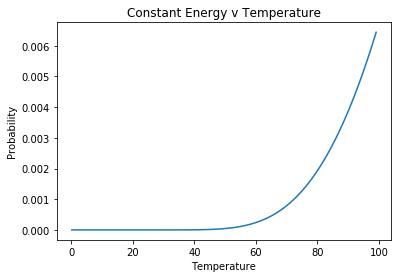

In [14]:
# Create ranges of temperature and energy.
temp_range = np.arange(0.1, 100)
energy_range = np.arange(0.1, 100)

fig, ax = plt.subplots()
ax.plot(temp_range, calc_Boltz_Dist_Prob(500, temp_range))
ax.set_title('Constant Energy v Temperature')
ax.set_ylabel('Probability')
ax.set_xlabel('Temperature')
plt.show()

## Adding Color as a dimension

See the documentation for `np.mesh()` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [15]:
# Create a mesh grid of these points so that we can
# visualize this function in three dimensions.
temp_mesh, energy_mesh = np.meshgrid(temp_range, energy_range)

# Calculate the Boltzmann Mesh
boltz_mesh = calc_Boltz_Dist_Prob(temp_mesh, energy_mesh)

### Plot the Boltzmann Distribution

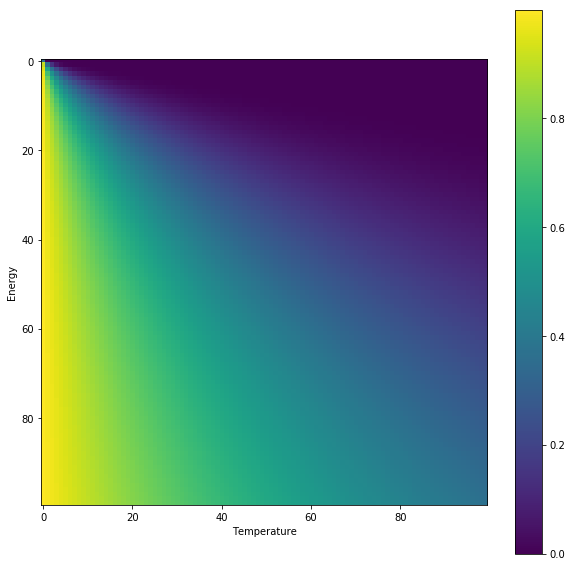

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Temperature')
ax.set_ylabel('Energy')
plt.imshow(boltz_mesh)
plt.colorbar()
plt.show()

## Another Spatial Dimension

`Matplotlib` supports simple 3-dimensional plots, although this requires the use of a new axis type. [Matplot3d Tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

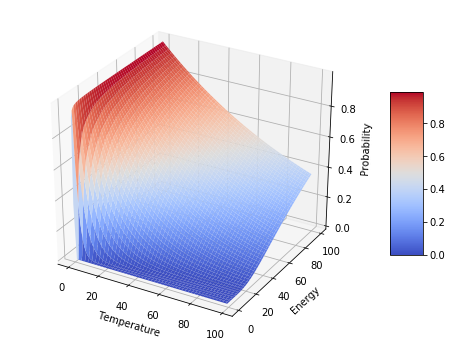

In [18]:
fig = plt.figure(figsize=(8,6))

# New code here!
ax = fig.gca(projection='3d')

surf = ax.plot_surface(
    temp_mesh, 
    energy_mesh, 
    boltz_mesh,
    cmap=matplotlib.cm.coolwarm,
)

ax.set_xlabel('Temperature')
ax.set_ylabel('Energy')
ax.set_zlabel('Probability')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Assignment

Re-create the colormapped image and the 3D mesh plot with a function of your own choosing.

In [19]:
# Function definition.

In [26]:
# imshow

In [27]:
# 3D mesh plot.

# Assignment

This part is a little different. Instead of telling you what plot to make and what data to use -- you will pick both.

1. Look through the examples at the [matplotlib gallery](https://matplotlib.org/gallery/index.html) or [bokeh gallery](http://bokeh.pydata.org/en/latest/docs/gallery.html).
2. Pick one that interests you.
3. Generate or find data that is amenable to the plot type.
4. Plot!

*This may be very hard. You should pick something interesting to you, do not worry if you are unable to finish this part.* **Work for only up to 2 hours on this part.**

We will finish and share these in class.